In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline


#Simple Weighted

In [2]:
#Importing "The Movies Dataset" while checking and replacing for null values with np.nan
missing_value = ["N/a", "na", "nan", np.nan]
the_movies_df = pd.read_csv("../recommendation_sys/movies_metadata.csv", na_values = missing_value)
the_movies_df.head()
the_movies_df.isnull().sum()
the_movies_df.shape
the_movies_df.info()

/home/ac-optimus/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [3]:
#We only need the "id", "popularity", "title", "vote_average", "vote_count" columns
#Of the 45466 entries, "title" has 45460 non-null entries, so we'll drop the rows which have null entry for "title" 
the_movies_df = the_movies_df.dropna(axis=0, subset=['title'])
the_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45460 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45460 non-null  object 
 1   belongs_to_collection  4490 non-null   object 
 2   budget                 45460 non-null  object 
 3   genres                 45460 non-null  object 
 4   homepage               7778 non-null   object 
 5   id                     45460 non-null  object 
 6   imdb_id                45443 non-null  object 
 7   original_language      45449 non-null  object 
 8   original_title         45460 non-null  object 
 9   overview               44506 non-null  object 
 10  popularity             45460 non-null  object 
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  re

In [4]:
#Cleaning the "the_movies_df"
the_movies_df = the_movies_df.drop(columns = ['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'video'])
the_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45460 entries, 0 to 45465
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            45460 non-null  object 
 1   popularity    45460 non-null  object 
 2   title         45460 non-null  object 
 3   vote_average  45460 non-null  float64
 4   vote_count    45460 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.1+ MB


In [5]:
#Converting popularity to float64
the_movies_df["popularity"] = pd.to_numeric(the_movies_df["popularity"])
the_movies_df["id"] = pd.to_numeric(the_movies_df["id"])

the_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45460 entries, 0 to 45465
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            45460 non-null  int64  
 1   popularity    45460 non-null  float64
 2   title         45460 non-null  object 
 3   vote_average  45460 non-null  float64
 4   vote_count    45460 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.1+ MB


In [6]:
#Reordering the columns of "the_movies_df" 
the_movies_df = the_movies_df.reindex(columns=['id', 'title', 'vote_average', 'vote_count', 'popularity'])
the_movies_df.head()

,id,title,vote_average,vote_count,popularity
0,862,Toy Story,7.7,5415.0,21.946943
1,8844,Jumanji,6.9,2413.0,17.015539
2,15602,Grumpier Old Men,6.5,92.0,11.712900
3,31357,Waiting to Exhale,6.1,34.0,3.859495
4,11862,Father of the Bride Part II,5.7,173.0,8.387519


In [7]:
#Normalizing the "vote_average" in range 0 to 5
the_movies_df['vote_average'] = (the_movies_df['vote_average'] - the_movies_df['vote_average'].min()) / (the_movies_df['vote_average'].max() - the_movies_df['vote_average'].min())*5
the_movies_df.head()

,id,title,vote_average,vote_count,popularity
0,862,Toy Story,3.85,5415.0,21.946943
1,8844,Jumanji,3.45,2413.0,17.015539
2,15602,Grumpier Old Men,3.25,92.0,11.712900
3,31357,Waiting to Exhale,3.05,34.0,3.859495
4,11862,Father of the Bride Part II,2.85,173.0,8.387519


## Why weighted average?

##### There can be movies which have rating = 10 but have only 1 vote, in-order to avoid the overall ranking to be influenced by such ratings, we are using IMDB's weighted rating formula

##IMDB weighted rating 
####https://en.wikipedia.org/wiki/IMDb#Rankings

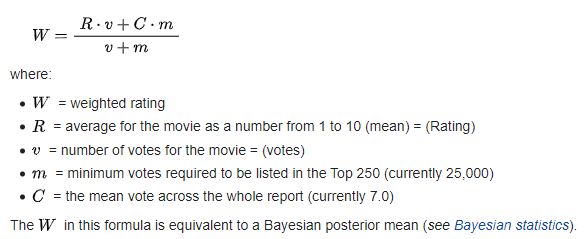

##### Note: Need to change the where statement values

In [8]:
#More about quantile "https://youtu.be/IFKQLDmRK0Y"
R = the_movies_df['vote_average']
v = the_movies_df['vote_count']
m = the_movies_df['vote_count'].quantile(0.75) #number of votes below which there are 75% of dataset values 
C = the_movies_df['vote_average'].mean()

In [9]:
the_movies_df['weighted_average_rating'] = (R*v + C*m)/(v+m)
the_movies_df.head()

,id,title,vote_average,vote_count,popularity,weighted_average_rating
0,862,Toy Story,3.85,5415.0,21.946943,3.843505
1,8844,Jumanji,3.45,2413.0,17.015539,3.441095
2,15602,Grumpier Old Men,3.25,92.0,11.712900,3.131028
3,31357,Waiting to Exhale,3.05,34.0,3.859495,2.929552
4,11862,Father of the Bride Part II,2.85,173.0,8.387519,2.843283


In [10]:
the_movies_df_weighted_average_rating = the_movies_df.sort_values('weighted_average_rating', ascending = False)
the_movies_df_weighted_average_rating.head(10)

,id,title,vote_average,vote_count,popularity,weighted_average_rating
10309,19404,Dilwale Dulhania Le Jayenge,4.55,661.0,34.457024,4.464834
314,278,The Shawshank Redemption,4.25,8358.0,51.645403,4.244162
834,238,The Godfather,4.25,6024.0,41.109264,4.241913
40251,372058,Your Name.,4.25,1030.0,34.461252,4.203956
12481,155,The Dark Knight,4.15,12269.0,123.167259,4.146294
2843,550,Fight Club,4.15,9678.0,63.869599,4.145306
292,680,Pulp Fiction,4.15,8670.0,140.950236,4.144762
39085,192040,Planet Earth,4.40,176.0,4.501137,4.142426
522,424,Schindler's List,4.15,4436.0,41.725123,4.139801
23673,244786,Whiplash,4.15,4376.0,64.299990,4.139662


#Weighted average + popularity

## Why include popularity?
##### There can be popular movies for which not many people have voted, in-order to account for that, we'll give 50% weightage to popularity and 50% to the weighted_average_rating

In [11]:
#Normalizing the weighted_average_rating and popularity as the popularity and weighted average have different magnitude scale
the_movies_df['weighted_average_rating'] = (the_movies_df['weighted_average_rating'] - the_movies_df['weighted_average_rating'].min()) / (the_movies_df['weighted_average_rating'].max() - the_movies_df['weighted_average_rating'].min())
the_movies_df['popularity'] = (the_movies_df['popularity'] - the_movies_df['popularity'].min()) / (the_movies_df['popularity'].max() - the_movies_df['popularity'].min())
the_movies_df.head()

,id,title,vote_average,vote_count,popularity,weighted_average_rating
0,862,Toy Story,3.85,5415.0,0.040087,0.818679
1,8844,Jumanji,3.45,2413.0,0.031079,0.701245
2,15602,Grumpier Old Men,3.25,92.0,0.021394,0.610759
3,31357,Waiting to Exhale,3.05,34.0,0.007049,0.551963
4,11862,Father of the Bride Part II,2.85,173.0,0.015320,0.526787


In [12]:
the_movies_df['weighted_rating_popularity'] = (the_movies_df['weighted_average_rating']*0.5) + (the_movies_df['popularity']*0.5)
the_movies_df.head()

,id,title,vote_average,vote_count,popularity,weighted_average_rating,weighted_rating_popularity
0,862,Toy Story,3.85,5415.0,0.040087,0.818679,0.429383
1,8844,Jumanji,3.45,2413.0,0.031079,0.701245,0.366162
2,15602,Grumpier Old Men,3.25,92.0,0.021394,0.610759,0.316077
3,31357,Waiting to Exhale,3.05,34.0,0.007049,0.551963,0.279506
4,11862,Father of the Bride Part II,2.85,173.0,0.015320,0.526787,0.271054


In [13]:
the_movies_df_weighted_rating_popularity = the_movies_df.sort_values('weighted_rating_popularity', ascending = False)
the_movies_df_weighted_rating_popularity.head(10)

,id,title,vote_average,vote_count,popularity,weighted_average_rating,weighted_rating_popularity
30700,211672,Minions,3.20,4729.0,1.000000,0.630073,0.815036
33356,297762,Wonder Woman,3.60,5025.0,0.537613,0.746067,0.641840
24455,177572,Big Hero 6,3.90,6289.0,0.390602,0.833454,0.612028
42222,321612,Beauty and the Beast,3.40,5530.0,0.524675,0.688199,0.606437
292,680,Pulp Fiction,4.15,8670.0,0.257449,0.906594,0.582022
43644,339403,Baby Driver,3.60,2083.0,0.416507,0.743911,0.580209
26566,283995,Guardians of the Galaxy Vol. 2,3.80,4858.0,0.338511,0.803974,0.571243
12481,155,The Dark Knight,4.15,12269.0,0.224968,0.907042,0.566005
23675,210577,Gone Girl,3.95,6023.0,0.282748,0.847889,0.565318
26564,293660,Deadpool,3.70,11444.0,0.343132,0.776031,0.559581


In [14]:
predict_df = the_movies_df_weighted_rating_popularity[['id','weighted_average_rating','weighted_rating_popularity']]

In [15]:
# import the data covert that into a convenient data
PATH= '/home/ac-optimus/data_science/recommendation_sys/ratings.csv'
df = pd.read_csv(PATH, sep= ",")[:100000]
# df = pd.read_csv(PATH, sep= ",")
df.shape

(100000, 4)

In [16]:
def error(y_hat, y):
    # MSE
    y_hat = np.array(y_hat)
    y = np.array(y)
    MSE_ = (y_hat- y)**2
    MSE = MSE_.sum()
    return MSE

In [17]:
from sklearn.utils import shuffle

num_rows = df.shape[0]
train, test = df.copy(deep = True), df[int(num_rows*0.8):].copy(deep = True)
train[int(num_rows*0.8):]['rating']  = train[int(num_rows*0.8):]['rating']*0
train = shuffle(train)

<ipython-input-17-dc6b4da3cda8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[int(num_rows*0.8):]['rating']  = train[int(num_rows*0.8):]['rating']*0


In [53]:
%%time
# looking for optimal k
y= test['rating']
errors = {}
y_hat = []
misses = 0
for i in test.index:
    user_i, movie_j = map(int,[test.loc[i]['userId'], 
                               test.loc[i]['movieId']])
    # make the prediction here
    if movie_j in predict_df['id'].tolist():
        predicted_rating = predict_df[
                        predict_df['id']==movie_j]['weighted_average_rating'].values[0]*5
    else:
        misses+=1
        predicted_rating = 0
    y_hat.append(predicted_rating)
#     print (predicted_rating)
error_i = error(np.nan_to_num(np.array(y_hat)), y)        
# errors[k]=error_i


CPU times: user 1min 15s, sys: 1.07 s, total: 1min 16s
Wall time: 1min 17s


In [55]:
misses

11319

In [38]:
predict_df[predict_df['id']==211672]['weighted_average_rating'].values[0]

0.6300729375791358

In [56]:
error_i

161777.1973814876

In [52]:
predict_df

,id,weighted_average_rating,weighted_rating_popularity
30700,211672,0.630073,0.815036
33356,297762,0.746067,0.641840
24455,177572,0.833454,0.612028
42222,321612,0.688199,0.606437
292,680,0.906594,0.582022
...,...,...,...
3471,5491,0.179113,0.094375
17708,40016,0.172916,0.088768
13566,14164,0.146683,0.081448
43393,271404,0.132545,0.072132
